In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:
root_path = '../'
datasets = ['mnli'] # agnews, 'mnli',, 'yahoo','yelp-full'
methods = ['fedpet'] # 'fedclassifier',
clients_in_total_list=[(2**i) for i in range(6)][3:]  # todo 10 50 100
samples_per_client_list=[(2**i) for i in range(6)]
client_per_round = 5

pattern_ids = 0

# datasets = ['yelp-full-9.2'] # agnews, 'mnli',, 'yahoo','yelp-full'
# methods = ['fedpet'] # 'fedclassifier',
# clients_in_total_list=[100]  # todo 10 50 100
# samples_per_client_list=[1,5,10,50,100] 
# client_per_round = 10

# datasets = ['agnews'] # agnews, 'mnli',, 'yahoo','yelp-full'
# methods = ['fedclassifier'] # 'fedclassifier',
# clients_in_total_list=[1, 2, 4, 8, 16, 32]  # todo 10 50 100 
# samples_per_client_list=[1, 2, 4, 8, 16, 32]#  
# client_per_round = 5

iter = 200

log_paths_all = {}
csv_paths_all = {}
for dataset in datasets:
    log_paths_all[dataset] = []
    csv_paths_all[dataset] = []
    for method in methods:
        for clients_in_total in clients_in_total_list:
            clients = min(clients_in_total, client_per_round)
            for samples_per_client in samples_per_client_list:
                # if clients_in_total == 1 and samples_per_client == 32:
                #     continue
                # if clients_in_total == 2 and samples_per_client == 32:
                #     continue
                # if clients_in_total == 8 and samples_per_client == 8:
                #     continue
                # if clients_in_total == 16 and samples_per_client == 16:
                #     continue
                sampled_data = clients_in_total * samples_per_client
                log_paths_all[dataset].append(os.path.join(root_path, 'log', dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + '_' + str(pattern_ids)+ ".log"))
                # log_paths_all[dataset].append(os.path.join(root_path, 'log', dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
                csv_paths_all[dataset].append(os.path.join(root_path, "data", dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))


In [3]:
# log_paths_all['agnews'] = log_paths_all['agnews'][2:]
# csv_paths_all['agnews'] = csv_paths_all['agnews'][2:]

In [4]:
log_paths_all

{'mnli': ['../log/mnli/fedpet_8_8_0.log',
  '../log/mnli/fedpet_16_8_0.log',
  '../log/mnli/fedpet_32_8_0.log',
  '../log/mnli/fedpet_64_8_0.log',
  '../log/mnli/fedpet_128_8_0.log',
  '../log/mnli/fedpet_256_8_0.log',
  '../log/mnli/fedpet_16_16_0.log',
  '../log/mnli/fedpet_32_16_0.log',
  '../log/mnli/fedpet_64_16_0.log',
  '../log/mnli/fedpet_128_16_0.log',
  '../log/mnli/fedpet_256_16_0.log',
  '../log/mnli/fedpet_512_16_0.log',
  '../log/mnli/fedpet_32_32_0.log',
  '../log/mnli/fedpet_64_32_0.log',
  '../log/mnli/fedpet_128_32_0.log',
  '../log/mnli/fedpet_256_32_0.log',
  '../log/mnli/fedpet_512_32_0.log',
  '../log/mnli/fedpet_1024_32_0.log']}

In [5]:
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

In [6]:
i = 0
for dataset in datasets:
    log_paths = log_paths_all[dataset]
    csv_paths = csv_paths_all[dataset]
    for method in methods:
        for clients_in_total in clients_in_total_list:
            clients = min(clients_in_total, client_per_round)
            for samples_per_client in samples_per_client_list:
                print("clients_in_total: {clients_in_total}; samples_per_client: {samples_per_client}".format(clients_in_total = clients_in_total, samples_per_client=samples_per_client))
                
                sampled_data = clients_in_total * samples_per_client
                log_path = log_paths[i]
                phrase = 'aggregated model performance is'
                with open(log_path) as f:
                    f = f.readlines()
                df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
    
                for line in f:
                    if phrase in line:
                        gen = int(re.findall(r'Gen (.+?) ',line)[0])
                        client = 0
                        
                        acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                        df[client][gen]=acc
                print(df)
                df.to_csv(csv_paths[i])
                i = i+1

        # print(log_path)
        # print(df)


clients_in_total: 8; samples_per_client: 1
            0
0    0.372605
1    0.369047
2    0.376482
3         NaN
4         NaN
..        ...
195       NaN
196       NaN
197       NaN
198       NaN
199       NaN

[200 rows x 1 columns]
clients_in_total: 8; samples_per_client: 2
            0
0    0.374269
1    0.459688
2    0.393404
3         NaN
4         NaN
..        ...
195       NaN
196       NaN
197       NaN
198       NaN
199       NaN

[200 rows x 1 columns]
clients_in_total: 8; samples_per_client: 4
            0
0    0.376605
1      0.4856
2    0.538875
3         NaN
4         NaN
..        ...
195       NaN
196       NaN
197       NaN
198       NaN
199       NaN

[200 rows x 1 columns]
clients_in_total: 8; samples_per_client: 8
            0
0    0.388719
1    0.349789
2    0.438788
3    0.462912
4     0.49906
..        ...
195       NaN
196       NaN
197       NaN
198       NaN
199       NaN

[200 rows x 1 columns]
clients_in_total: 8; samples_per_client: 16
            0
0 

In [7]:
df = pd.DataFrame(index = clients_in_total_list, columns = samples_per_client_list)

3
clients_in_total: 8; samples_per_client: 1 max accuracy is:  0.376482470334412
3
clients_in_total: 8; samples_per_client: 2 max accuracy is:  0.4596882416396979
3
clients_in_total: 8; samples_per_client: 4 max accuracy is:  0.5388745954692556
113
clients_in_total: 8; samples_per_client: 8 max accuracy is:  0.6696516990291262
1
clients_in_total: 8; samples_per_client: 16 max accuracy is:  0.3563592233009708
3
clients_in_total: 8; samples_per_client: 32 max accuracy is:  0.7271750269687164
3
clients_in_total: 16; samples_per_client: 1 max accuracy is:  0.4203282092772384
3
clients_in_total: 16; samples_per_client: 2 max accuracy is:  0.448986380798274
3
clients_in_total: 16; samples_per_client: 4 max accuracy is:  0.4584708737864078
3
clients_in_total: 16; samples_per_client: 8 max accuracy is:  0.6736614077669903
3
clients_in_total: 16; samples_per_client: 16 max accuracy is:  0.7058137810140238
3
clients_in_total: 16; samples_per_client: 32 max accuracy is:  0.7381810949298814
3
clie

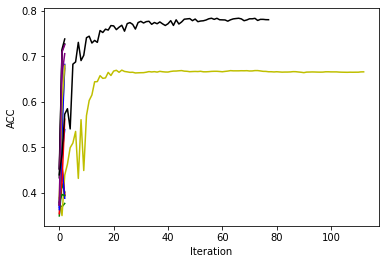

In [8]:
i = 0

df_heatmap = pd.DataFrame(index = clients_in_total_list, columns = samples_per_client_list)

for dataset in datasets:
    fig = plt.figure()
    # plt.title(dataset)
    plt.xlabel('Iteration')
    plt.ylabel('ACC')
    csv_paths = csv_paths_all[dataset]

    for method in methods:
        for clients_in_total in clients_in_total_list:
            clients = min(clients_in_total, 10)
            for samples_per_client in samples_per_client_list:
                csv_path = csv_paths[i]

                df = pd.read_csv(csv_path,index_col=0)
                df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
                if df.empty:
                    print("Bug:",clients_in_total, samples_per_client)
                    i = i+1
                    continue
                iter = len(df.index)
                print(iter)
                y_mean = []
                for j in range(iter):
                    x = np.array([j]*clients)
                    y = np.array(df.iloc[j])

                    y_mean.append(pd.DataFrame(y).dropna().mean())
                    # plt.scatter(x, y,color=colors[i])
                print("clients_in_total: {clients_in_total}; samples_per_client: {samples_per_client} max accuracy is: ".format(clients_in_total = clients_in_total, samples_per_client=samples_per_client), float(np.max(pd.DataFrame(y_mean).dropna())))

                df_heatmap[samples_per_client][clients_in_total] = float(np.max(pd.DataFrame(y_mean).dropna()))

                client_index = clients_in_total_list.index(clients_in_total)
                sample_index = samples_per_client_list.index(samples_per_client)
                plt.plot(range(iter),y_mean,color=colors[sample_index],label="clients: {clients_in_total}; samples: {samples_per_client}".format(clients_in_total = clients_in_total, samples_per_client=samples_per_client))
                i = i+1
    # plt.legend()
    print("../fig/eval-performance-" + dataset + "_" + str(sampled_data) + '.pdf')
    plt.savefig("../fig/fedcls.pdf")

    df_heatmap.to_csv(os.path.join("../data", dataset, "heatmap.csv"))
    
    
    # plt.show()